# Homework 3 (07/01/2021)

1. Generate dataset using make_blobs function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).
2. Explore and analyse raw data.
3. Do preprocessing for classification.
4. Split your dataset into train and test test (0.7 for train and 0.3 for test).
5. Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
6. Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

## 1. Generate dataset using make_blobs function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).

In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 2000, n_features = 3,random_state = 54)

In [29]:
print('Shape of X is : ',X.shape)
print('Shape of y is : ',y.shape)

Shape of X is :  (2000, 3)
Shape of y is :  (2000,)


## 2. Explore and analyse raw data.

In [30]:
import pandas as pd

In [31]:
print(dfX.keys())
print(dfy.keys())

Index(['Column1', 'Column2', 'Column3'], dtype='object')
Index(['Column4'], dtype='object')


In [32]:
df = pd.concat([dfX, dfy], axis=1)

In [33]:
df.head()

,Column1,Column2,Column3,Column4
0,0.745490,-9.768157,9.459172,1
1,6.709158,5.165653,2.541969,2
2,-2.576403,-2.382869,-5.996101,0
3,0.993590,-11.467072,9.411242,1
4,1.399301,-10.252638,9.044864,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  2000 non-null   float64
 1   Column2  2000 non-null   float64
 2   Column3  2000 non-null   float64
 3   Column4  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [35]:
df.describe()

,Column1,Column2,Column3,Column4
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.592577,-2.480219,2.142048,0.999500
std,3.387705,6.236008,6.572030,0.816599
min,-4.573557,-13.602134,-9.663600,0.000000
25%,-1.145951,-9.122864,-5.670196,0.000000
50%,0.443815,-2.781502,3.381613,1.000000
75%,5.326868,4.505928,8.754521,2.000000
max,9.723443,8.526319,12.110467,2.000000


## 3. Do preprocessing for classification.

In [37]:
df.isna().sum()

Column1    0
Column2    0
Column3    0
Column4    0
dtype: int64

In [48]:
df.groupby(by="Column4").count()

,Column1,Column2,Column3
Column4,,,
0,667,667,667
1,667,667,667
2,666,666,666


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

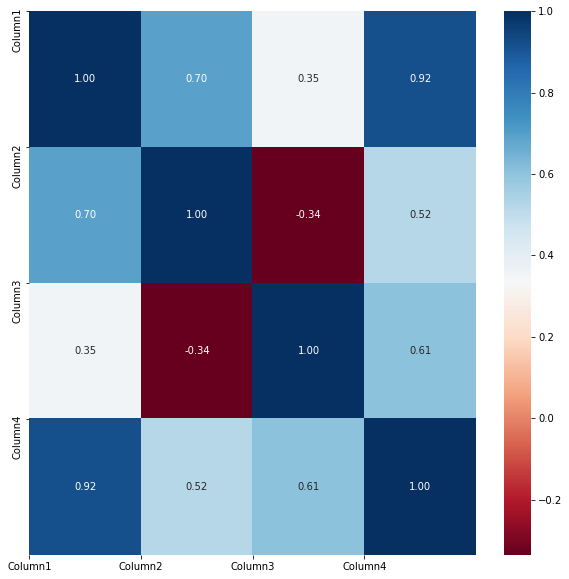

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

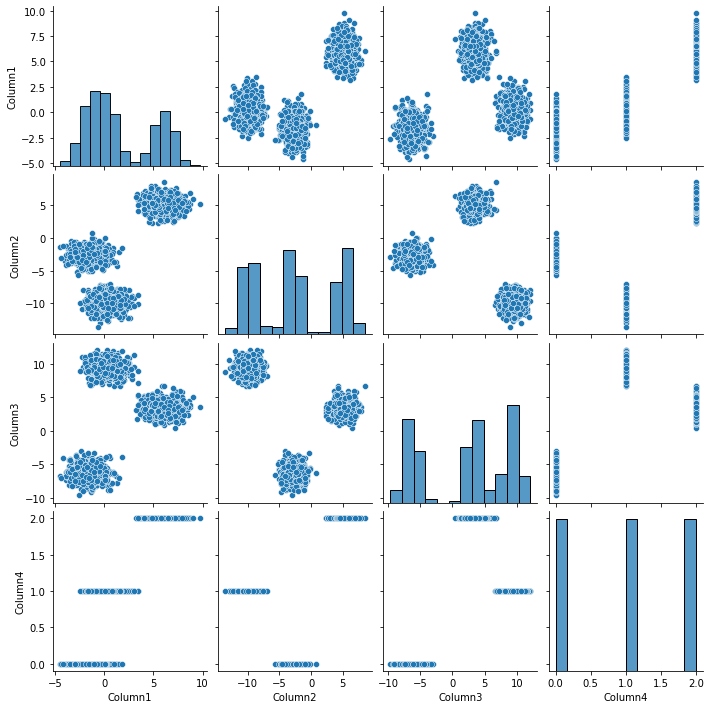

In [56]:
sns.pairplot(df)
plt.show()

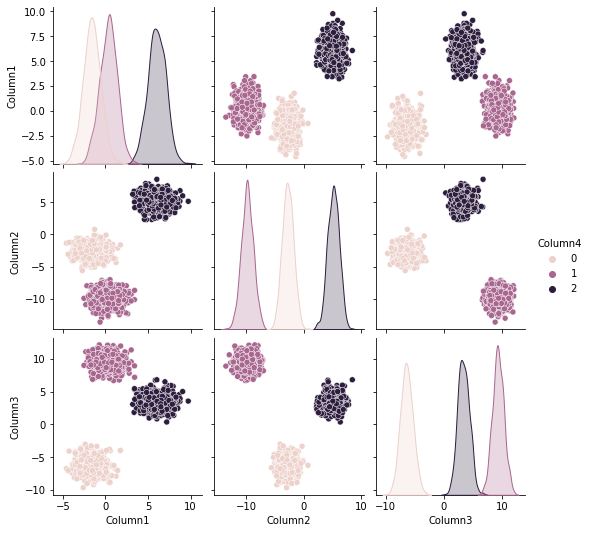

In [57]:
sns.pairplot(df,hue="Column4")
plt.show()

## 4. Split your dataset into train and test test (0.7 for train and 0.3 for test).

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 3)
(600, 3)
(1400,)
(600,)


## 5. Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)

In [87]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

In [127]:
clf = DecisionTreeClassifier(max_depth=4, random_state=54)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 1.0


In [76]:

pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00       197

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [88]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


In [92]:
pred1 = clf.predict(X_test)
confusion_matrix(y_test, pred1)

array([[198,   0,   0],
       [  0, 205,   0],
       [  0,   0, 197]])

---

## XGBoost Algorithm

In [150]:
import xgboost as xgb

In [151]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [152]:
param = {'max_depth':1, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[16:09:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [153]:
preds = model.predict(dmatrix_test)
preds[:5]

array([[0.00184746, 0.9963051 , 0.00184746],
       [0.00184746, 0.9963051 , 0.00184746],
       [0.00184506, 0.00184399, 0.9963109 ],
       [0.9963109 , 0.00184399, 0.00184506],
       [0.00184506, 0.00184399, 0.9963109 ]], dtype=float32)

In [154]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])
print(best_preds)

[1 1 2 0 2 2 1 2 0 2 2 0 1 2 2 1 2 0 2 2 2 1 1 1 2 0 0 0 2 2 2 0 0 0 0 2 1
 1 2 1 0 2 1 1 0 2 0 1 2 2 1 2 2 0 1 1 2 2 2 2 2 0 0 0 0 2 1 0 1 0 2 1 0 1
 0 2 1 2 2 0 2 1 0 2 2 0 0 0 2 2 1 0 0 2 1 1 1 2 2 2 2 1 2 2 0 1 1 1 1 1 0
 1 2 0 1 0 2 0 1 0 2 2 0 2 0 1 2 1 2 0 2 0 0 1 2 2 1 1 0 1 1 2 0 2 2 2 0 0
 0 2 0 2 0 1 1 0 0 1 1 1 0 2 2 1 0 1 0 0 2 0 1 2 1 0 2 1 1 0 0 2 2 1 1 1 2
 1 2 0 2 1 2 1 0 2 2 1 2 2 0 2 2 0 1 0 0 0 2 2 0 2 2 2 0 1 0 2 1 2 1 0 2 2
 0 1 1 1 0 1 1 0 0 2 2 0 1 2 0 2 0 0 1 0 2 0 1 0 1 1 1 2 2 1 1 1 2 0 1 0 0
 2 0 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 2 0 2 1 0 1 2 0 0 1 1 0 1 1 0 0 1 2 2 1
 0 1 1 0 0 0 2 2 1 0 1 0 1 0 1 1 1 2 2 2 2 1 0 1 2 0 2 2 0 0 0 1 0 1 1 1 1
 1 0 1 2 0 0 0 0 0 0 1 1 0 2 2 0 2 1 1 1 1 0 0 1 2 1 2 1 2 1 2 0 1 0 2 0 0
 0 1 1 2 2 1 0 2 1 0 1 2 1 2 2 2 2 2 1 0 0 2 0 1 1 0 0 2 2 1 0 0 1 1 1 1 1
 1 2 1 1 0 0 1 0 1 0 1 2 1 0 1 2 2 1 2 0 0 2 0 1 1 2 2 1 0 2 1 0 2 0 2 1 1
 2 2 0 0 2 2 1 2 0 1 2 1 2 2 2 1 0 1 0 2 1 0 1 1 0 0 0 1 0 0 2 1 0 1 1 1 0
 1 1 2 0 0 0 2 0 1 2 2 2 

In [155]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("F1 Score = {}".format(f1_score(y_test, best_preds,average='macro')))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


In [156]:
confusion_matrix(y_test, best_preds)

array([[198,   0,   0],
       [  0, 205,   0],
       [  0,   0, 197]])

## 6. Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

## Decision Tree Algorithm
- When max_depth = 1 Accuracy of train: 0.67 and Accuracy of test: 0.6583333333333333
- when increasing max_depth Accuracy of tain and test is 1 (Overfitting problem occur)

## XGBoost Algorithm
- When max_depth = 1 Overfitting problem occur
- When max_depth increasing Not Chnage 
